Linear regression for stock price prediction



For making predictions based on historical data, linear regression models are widely used in data analysis and predictive modeling. A set of input variables, also known as features, are used to establish a relationship between a target variable and the input variables. Based on new input data, linear regression models can generate predictions for the target variable. 
The purpose of this article is to compare actual and predicted values in a linear regression model. By exploring how these values align, we assess the model's ability to capture underlying patterns and trends. The degree of agreement between actual and predicted values provides insight into the model's accuracy and reliability. 
The pandas library in Python provides powerful tools for manipulating and analyzing data. Using pandas, we will create a DataFrame that includes both the actual values and the linear regression predictions. We can uncover patterns, discrepancies, and trends by visualizing this data. 
By comparing linear regression model predictions with actual values, this article provides a practical and intuitive understanding of how to evaluate a linear regression model. As a result of following the code examples and explanations provided, readers will be able to perform this comparison and derive meaningful insights from their own regression models.

Dataset Overview, There are approximately 60 features in the dataset, encompassing a variety of topics. The features are derived from OHLC (Open, High, Low, Close) data, as well as other index prices like QQQ (Nasdaq-100 ETF) and S&P 500. Further, the dataset incorporates technical indicators such as Bollinger Bands, Exponential Moving Averages (EMA), Stochastic %K oscillator, and RSI (Relative Strength Index). 
Furthermore, lagged features have been generated based on the previous day's price data since previous prices influence future prices. 

Also included are date-related features, such as whether it corresponds to a leap year, the beginning or end of a month, the beginning or end of a quarter, etc. 
For forecasting purposes, each of these features contributes valuable insights. There are features which reveal trends, others that provide signals regarding overbought or oversold conditions, and still others that indicate the strength of the price trend.

To forecast stock prices, this notebook analyzes data and builds a simple linear regression model. To enhance the accuracy of the predictions, I intend to explore alternative algorithms such as Random Forest, XGBoost, and LSTM in future notebooks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline


In this code snippet, Python is used to import libraries and set up the environment for data analysis and machine learning. 

The code imports the pandas library, which provides data manipulation and analysis functionality. For working with tabular data, this library is commonly used. 

To visualize and plot data, the matplotlib.pyplot module is imported as plt. In Python, Matplotlib is widely used for plotting. 
"from pylab import rcParams" imports rcParams from the pylab module, which allows customizing plot display options. 
Numeric operations and array manipulation are supported by the numpy library, imported as np. In scientific computing, it is often used. 
Seaborn is a data visualization library built on top of matplotlib, imported as sns. For creating attractive statistical graphics, it provides additional functionality and aesthetic enhancements. 
A way to interact with the operating system is provided by the os module, which has been imported. File and directory operations are commonly performed with it. 
Several modules and classes from the scikit-learn library are imported next. Python's Scikit-learn library is a popular machine learning library. 
Imported is the RandomForestRegressor class from sklearn.ensemble, which implements the random forest algorithm. 

To split the dataset into training and testing subsets, the train_test_split function is imported from sklearn.model_selection. 

GridSearchCV is imported from sklearn.model_selection, which performs an exhaustive search over specified parameter values. Models can be optimized by combining hyperparameters. 
Recursive feature elimination with cross-validation is performed using the RFECV class from sklearn.feature_selection. For each estimator, it automatically selects the optimal subset of features. 
For feature selection based on model importance or statistical tests, the SelectFromModel and SelectKBest classes from sklearn.feature_selection are imported. 
Using the StandardScaler class from sklearn.preprocessing, features are standardized by removing the mean and scaling to unit variance. Numerical data are commonly preprocessed with it. 
Sklearn's metrics module is imported, which provides various metrics for evaluating machine learning models. 
In addition, we use the "%matplotlib inline" command in Jupyter Notebook to display matplotlib plots within the notebook.

The data should be loaded.


For this notebook, I will use Apple Stock Data

In [2]:
Stock = pd.read_csv('../input/us-stock-market-data-60-extracted-features/AAPL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

Open  High   Low  Close     Volume      SD20  Upper_Band  \
Date                                                                   
2005-10-17  6.66  6.69  6.50   6.60  154208600  0.169237    6.827473   
2005-10-18  6.57  6.66  6.44   6.45  152397000  0.168339    6.819677   
2005-10-19  6.43  6.78  6.32   6.78  252170800  0.180306    6.861112   
2005-10-20  6.72  6.97  6.71   6.93  339440500  0.202674    6.931847   
2005-10-21  7.02  7.03  6.83   6.87  199181500  0.216680    6.974860   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2005-10-17    6.150527          6.67          6.63  ...    33.692   33.9970   
2005-10-18    6.146323          6.60          6.67  ...    33.570   33.9525   
2005-10-19    6.139888          6.45          6.60  ...    33.562   33.9600   
2005-10-20    6.121153          6.78          6.45  ...    33.567   33.9455   
2005-10-21    6.108140          6.93          6.78  ...    33.586   33.9365   

            QQQ_MA50  SnP_Close  SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  \
Date                                                                           
2005-10-17   34.2690    1190.10    1186.57   1187.33    10348.10    10287.34   
2005-10-18   34.2466    1178.14    1190.10   1184.87    10285.26    10348.10   
2005-10-19   34.2330    1195.76    1178.14   1177.68    10414.13    10285.26   
2005-10-20   34.2190    1177.80    1195.76   1176.84    10281.10    10414.13   
2005-10-21   34.2034    1179.59    1177.80   1186.57    10215.22    10281.10   

            DJIA(t-5)  Close_forcast  
Date                                  
2005-10-17   10238.76           6.45  
2005-10-18   10253.17           6.78  
2005-10-19   10216.91           6.93  
2005-10-20   10216.59           6.87  
2005-10-21   10287.34           7.01  

[5 rows x 63 columns]

Using the pandas library, the code below performs operations on a dataset. 

First, a CSV file named "AAPL.csv" is read from the directory "../input/us-stock-market-data-60-extracted-features". We load the data from the CSV file into a pandas DataFrame called Stock. Index_col=0 specifies that the first column of the CSV file should be used as the DataFrame index. 
The next line creates a new DataFrame called "df_Stock" with the same data as "Stock". In this step, a copy of the original DataFrame is made for further modifications, while keeping the original intact. 
This line renames a column in the "df_Stock" DataFrame. "Close(t)" has been renamed to "Close". Renaming columns can be useful for standardizing or improving their names. 
To inspect the changes and verify the data, we use "df_Stock.head()" to display the first few rows of the modified DataFrame. A DataFrame's "head()" function returns the first n rows, with the default value of n being 5.

In [7]:
df_Stock.tail(5)

Open    High     Low   Close    Volume       SD20  Upper_Band  \
Date                                                                          
2020-08-07  452.82  454.70  441.17  444.45  49453300  27.954399  455.316298   
2020-08-10  450.40  455.10  440.00  450.91  53100900  29.847338  462.586675   
2020-08-11  447.88  449.93  436.43  437.50  46975600  30.576290  466.543079   
2020-08-12  441.99  453.10  441.19  452.04  41486200  32.050532  472.583564   
2020-08-13  457.72  464.17  455.71  460.04  52520500  33.532634  479.279768   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2020-08-07  343.498702        454.79        439.46  ...   266.054  263.4085   
2020-08-10  343.197325        444.45        454.79  ...   267.073  263.9970   
2020-08-11  344.237921        450.91        444.45  ...   267.911  264.2380   
2020-08-12  344.381436        437.50        450.91  ...   269.120  264.7860   
2020-08-13  345.149232        452.04        437.50  ...   270.255  265.4540   

            QQQ_MA50  SnP_Close  SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  \
Date                                                                           
2020-08-07  252.2098    3351.28    3349.16   3271.12    27433.48    27386.98   
2020-08-10  252.9570    3360.47    3351.28   3294.61    27791.44    27433.48   
2020-08-11  253.5878    3333.69    3360.47   3306.51    27686.91    27791.44   
2020-08-12  254.3206    3380.35    3333.69   3327.77    27976.84    27686.91   
2020-08-13  255.0446    3373.43    3380.35   3349.16    27896.72    27976.84   

            DJIA(t-5)  Close_forcast  
Date                                  
2020-08-07   26428.32         450.91  
2020-08-10   26664.40         437.50  
2020-08-11   26828.47         452.04  
2020-08-12   27201.52         460.04  
2020-08-13   27386.98         459.63  

[5 rows x 63 columns]

In the given code, the pandas library is used to manipulate a DataFrame called "df_Stock" in Python. 
The "df_Stock.tail(5)" line displays the last five rows of the DataFrame. By examining the most recent data in the DataFrame, we can verify that any changes or updates have been made. 
"tail()" returns the last n rows of a DataFrame, with n set to 5 by default. The code specifies 5 as the argument within the parentheses to display the last five rows of the DataFrame. 
When dealing with time-series data or when interested in the latest observations, this code snippet is commonly used to quickly check the recent entries in a DataFrame.

In [4]:
df_Stock.shape

(3732, 63)

Python code is provided that operates on a DataFrame called "df_Stock" using pandas. 
"df_Stock.shape" retrieves the DataFrame's shape or dimensions. The function returns a tuple containing the number of rows and columns in the DataFrame. 
In the tuple, the first value indicates the number of rows or observations in the DataFrame, and the second value indicates the number of columns or variables. The values provide an overview of the size and structure of the DataFrame. 
This code enables you to quickly determine the number of rows and columns in a DataFrame by accessing the "shape" attribute, which is useful for various data analysis and manipulation tasks.

In [5]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

It uses the pandas library to operate on a DataFrame called "df_Stock" written in Python. 
DataFrame column names or labels can be obtained using the expression "df_Stock.columns". All columns in the DataFrame are returned as a list or array-like object. 
The code above allows you to access and inspect the column names of the DataFrame, which can be helpful for understanding the available data and manipulating it. The column names enable you to refer to specific columns by their names and access the corresponding data for analysis, visualization, or further processing.

AAPL Time Series Chart

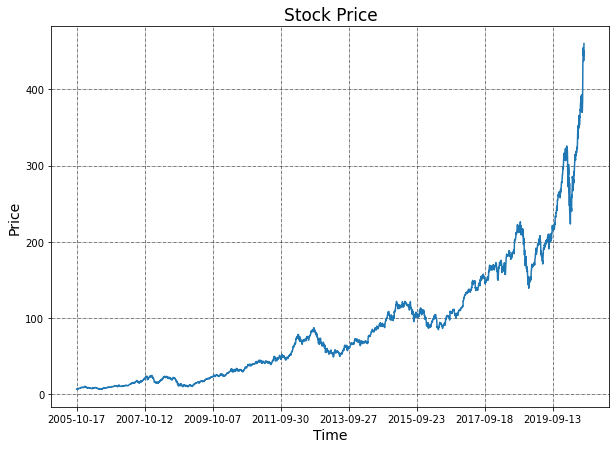

In [6]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

This Python code plots a line graph of the 'Close' column from the DataFrame 'df_Stock' using the pandas and matplotlib libraries. 
"df_Stock['Close'].plot(figsize=(10, 7))" plots the values of the 'Close' column from the DataFrame. The 'figsize=(10, 7)' parameter specifies a width of 10 units and a height of 7 units for the figure. 
The following lines of code add labels and customize the plot's appearance. "plt.title("Stock Price", fontsize=17)" sets the plot's title as "Stock Price" with a font size of 17. "plt.ylabel('Price', fontsize=14)" and "plt.xlabel('Time', fontsize=14)" assign labels to the y and x axes, indicating 'Price' and 'Time' with font sizes of 14. 
"plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)" adds a grid to the plot, displaying horizontal and vertical lines. The grid is customized to have a major grid style, black color ('k'), a dashed line style ('-.'), and a line width of 0.5. Finally, the "plt.show()" line displays the plot on the screen. A plot displays changes in the 'Close' price values and helps identify trends or patterns.

Columns that are not needed should be removed

In [16]:
df_Stock = df_Stock.drop(columns='Date_col')

Using the pandas library, the provided code operates on a DataFrame called "df_Stock". 
"df_Stock = df_Stock.drop(columns='Date_col')" deletes the 'Date_col' column from the DataFrame 'df_Stock'. 

When the "drop" function is used with the "columns" parameter, the specified column is excluded from the DataFrame. Dropping 'Date_col' is the name of the column. 
By assigning the modified DataFrame back to the variable "df_Stock", the DataFrame is effectively updated without the 'Date_col' column. 
When the 'Date_col' column is no longer relevant to the analysis or processing being performed, this code snippet may be useful to remove it from the DataFrame.

Set of test trains

In this case, close_forecast is the column we are trying to predict, which is the price for the next day.

In [17]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

This code defines a function named "create_train_test_set" that takes a DataFrame named "df_Stock" as input. For further analysis or machine learning, this function creates train, validation, and test sets from the given DataFrame. 
The code performs the following steps inside the function. By removing the 'Close_forcast' column from the input DataFrame, it creates a new DataFrame called "features". Predictions are based on this column, which is considered the target variable. It also assigns the 'Close_forcast' column to a variable named "target", which represents the prediction target. 
Using the "shape" attribute, the code calculates the length of the input DataFrame and stores it in the variable "data_len". Providing the number of rows or observations in the DataFrame, it prints the length of the historical stock data. 
Using these indices, the code divides the data into train, validation, and test sets based on the specified proportions (88% for training, 10% for validation, and 2% for testing). In addition, it prints the number of rows in the training, validation, and test sets. 
Based on the calculated indices, the features and target variables are divided into separate sets for training, validation, and testing. X_train, X_val, and X_test are the features, while Y_train, Y_val, and Y_test are the target variables. 
In addition to the features and target variables, the code prints the shapes (number of rows and columns) of the training, validation, and test sets. Each set's dimensions are shown here. 
This function returns the sets X_train, X_val, X_test, Y_train, Y_val, and Y_test, which represent the feature and target variables split into train, validation, and test sets, respectively. 
This function simplifies the process of creating train, validation, and test sets from a given DataFrame, making it easier to analyze or train machine learning models.

In [18]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


In the provided code, a function named "create_train_test_set" operates on a DataFrame called "df_Stock". 
With the DataFrame "df_Stock" as an argument, the line "X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)" calls the "create_train_test_set" function. There are six sets of data returned by the function: X_train, X_val, X_test, Y_train, Y_val, and Y_test. 
These returned sets represent the feature variables (X_train, X_val, X_test) and their corresponding target variables (Y_train, Y_val, Y_test). Based on the logic and calculations implemented in the "create_train_test_set" function, these sets are generated. 
In this line of code, the returned values are assigned to the corresponding variables, X_train, X_val, X_test, Y_train, Y_val, and Y_test, allowing for easy access to the training, validation, and test sets for subsequent analysis, modeling, or evaluation.

Linear regression prediction

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

Python code is provided that imports the LinearRegression class from scikit-learn. 
In the line "lr = LinearRegression()", an instance of the LinearRegression class is created and assigned to the variable "lr". A linear regression model is initialized in this step. 
In the following line, "lr.fit(X_train, Y_train)" fits the linear regression model to the training data. It takes two arguments: X_train represents the feature variables used for training, and Y_train represents the target variables. 
Using the "fit" method, the linear regression model learns the relationship between the input features (X_train) and the target variable (Y_train). To minimize the difference between the predicted outputs and the actual target values, it calculates the coefficients or weights for each feature. 
In this line of code, the linear regression model (lr) is trained or fitted to the training data, allowing it to make predictions based on the learned patterns.

In [20]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 8.63711643e-03  1.86051940e-01  1.55487122e-01  1.12263751e+00
  1.27286803e-10  6.75248222e-03  1.40229140e-01  1.13219364e-01
  4.25628128e-02  8.96348608e-02  1.01914941e-01  5.94183582e-02
  7.95194237e-02  7.10399936e-02  2.71424998e-01  1.26724315e-01
  8.79333083e-02 -5.87980436e-03 -3.31643395e-01 -3.31643395e-01
 -3.31643395e-01 -3.31643395e-01 -3.31643395e-01  1.88650022e+00
 -1.27270733e+00 -1.65042221e-01 -4.36658019e-04  3.32218457e-13
 -5.07434686e-03  9.02936465e-03  5.78316992e-04  5.78316992e-04
 -5.57918343e-01 -2.02304395e-10  4.18932250e-11  1.69322436e-02
  1.61636707e-02 -1.75659581e-02  6.12165522e-03  2.15420350e-01
  1.13979656e-01 -2.41954674e-01  7.63050303e-02  3.73276599e-01
 -4.99600361e-16 -5.60843986e-02  4.08788810e-02  5.13473858e-01
 -2.94431537e-02 -8.41335090e-02  5.10939137e-02 -8.14435741e-03
 -1.95035187e-02  5.67587247e-02  4.39707790e-02  1.29311735e-02
 -9.99967545e-03 -3.89778364e-03 -1.62174821e-03  1.44436912e-03
  2.83

Based on a trained linear regression model, the given code is written in Python. 
"print('LR Coefficients: /n', lr.coef_)" displays the linear regression coefficients. In the "lr.coef_" attribute, the coefficients or weights associated with each feature are returned as an array. Each coefficient indicates the magnitude and direction of each feature's influence on the target variable. Linear regression coefficients are displayed in this code, providing insight into each feature's importance and contribution. 
A linear regression model's intercept term is output by "print('LR Intercept: /n', lr.intercept_)". In the case of zero values for all features, the "lr.intercept_" attribute returns a single value representing the intercept. Model baseline predictions are influenced by the intercept term. In this line of code, we display the intercept value, which helps to understand the linear regression model's starting point. 
Information about the coefficients and intercept term of the linear regression model is provided by these print statements. By interpreting these values, one can gain a better understanding of how input features contribute to output predictions.

Analyses

In [21]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9994516474373267


A trained linear regression model is used in the given code, which is written in Python. 
The line "print("Performance (R^2): ", lr.score(X_train, Y_train))" calculates and prints the performance of the linear regression model using the coefficient of determination, also known as R-squared (R^2). 
As inputs, the "lr.score(X_train, Y_train)" method takes the training feature variables (X_train) and the target variables (Y_train). By measuring the proportion of variance in the target variable that can be explained by the model, it evaluates how well the trained linear regression model fits the training data. 
The R-squared value ranges from 0 to 1, with 1 indicating a perfect fit where the model explains all the variability in the target variable and 0 indicating no linear relationship. 
The printed output "Performance (R^2): " followed by the actual R-squared value provides an indication of the goodness of fit of the linear regression model to the training data. The higher the R-squared value, the better the model fits the data, implying the model captures a greater proportion of the variability. 
Using this code, we can assess how well the linear regression model captures underlying patterns and relationships between the features and the target variable based on the training data.

In [22]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

It defines a function named "get_mape" that calculates the mean absolute percentage error (MAPE) between two arrays: y_true and y_pred. 
For forecasting and regression tasks, MAPE is commonly used to measure predictions' accuracy. In other words, it quantifies the average percentage difference between the predicted values (y_pred) and the actual values (y_true). 
There are two arguments to the function: y_true represents the array of true values, and y_pred represents the array of predicted values. The np.array() function converts these arrays into numpy arrays, enabling efficient mathematical operations. 
MAPE is calculated by subtracting the predicted values (y_pred) from the true values (y_true), dividing the absolute differences by the true values, and then calculating the mean of these absolute percentage differences. 
To express MAPE as a percentage, the result is multiplied by 100, and the result is returned as the output. 
Calculating the MAPE is a convenient way to assess the accuracy of regression models and forecasting algorithms.

Test dataset prediction

In [23]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

It operates on a trained linear regression model named "lr" and three sets of feature variables: X_train, X_val, and X_test. 
Based on the corresponding feature variables in X_train, the line "Y_train_pred = lr.predict(X_train)" predicts the target variable values for the training set using the trained linear regression model, "lr". "Y_train_pred" contains the predicted values. 
Similarly, "Y_val_pred = lr.predict(X_val)" predicts the target variable values based on the linear regression model and the corresponding feature variables. Predicted values are assigned to the variable "Y_val_pred". 
Lastly, the line "Y_test_pred = lr.predict(X_test)" predicts the target variable values for the test set, using the linear regression model and the corresponding feature variables. "Y_test_pred" contains the predicted values. 
These lines of code make predictions based on the feature variables in the training, validation, and test sets using a trained linear regression model. There are three variables storing predicted values: Y_train_pred, Y_val_pred, and Y_test_pred. In order to assess the linear regression model's performance on different datasets, these predictions can be further analyzed, evaluated, or compared against the actual target variable values.

In [24]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.45
Training Mean Squared Error: 1.48
Training RMSE:  1.22
Training MAE:  0.76
 
Validation R-squared:  0.99
Validation Explained Variation:  0.99
Validation MAPE: 1.68
Validation Mean Squared Error: 1.48
Validation RMSE:  5.91
Validation MAE:  3.75
 
Test R-squared:  0.96
Test Explained Variation:  0.97
Test MAPE: 1.77
Test Mean Squared Error: 79.21
Test RMSE:  8.9
Test MAE:  6.5


Python code is provided to evaluate the performance of a linear regression model on training, validation, and test datasets. To evaluate the model's accuracy and quality, it calculates and prints various evaluation metrics. 
In the first block of code, we evaluate the model's performance on the training data. Several metrics are computed and displayed. A measure of the amount of variance explained by the model's predictions (Y_train_pred) is the R-squared (coefficient of determination). This metric measures how much of the target variable's variance is captured by the model's predictions. A MAPE (mean absolute percentage error) is calculated, which represents the average percentage difference between actual target values (Y_train) and predicted values (Y_train_pred). In addition, the mean squared error (MSE) is computed, which is the difference between the actual and predicted values. As a measure of the average magnitude of the errors made by the model, the RMSE (root mean squared error) is the square root of the mean squared error. In addition, MAE (mean absolute error) is calculated as the average absolute difference between actual and predicted values. 
There is a blank line separating the training set metrics from the next block of code that evaluates the model's performance on the validation set. For the validation set, the same metrics are calculated and displayed using the corresponding target variables (Y_val and Y_val_pred). 
The final block of code evaluates the model's performance on the test set after another blank line. The metrics for the test set are calculated and printed using the target variables (Y_test and Y_test_pred). 
The code provides a comprehensive assessment of the linear regression model's performance on the training, validation, and test sets. Metrics provide insight into the model's accuracy, fit, and predictive capability, as well as how well it performs on different datasets.

The Mean Absolute Error is decent, but not great. Later notebooks will include further tuned models. The dataset is just to get you started.

In [25]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

Date  Actual   Predicted
0   2018-11-01  202.30  216.289778
1   2018-11-02  196.56  201.470182
2   2018-11-05  198.68  195.948933
3   2018-11-06  204.71  199.043601
4   2018-11-07  204.00  204.193666
..         ...     ...         ...
368 2020-04-22  273.79  275.751755
369 2020-04-23  281.70  274.020244
370 2020-04-24  281.90  280.710045
371 2020-04-27  277.33  280.543603
372 2020-04-28  286.44  276.562125

[373 rows x 3 columns]

Using the pandas library, the code below operates on the variables Y_val, Y_val_pred, and df_pred. 
Using the line "df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)" creates a new DataFrame named "df_pred". Y_val values are assigned to a column named 'Actual' in this DataFrame. Y_val's index is set to match the DataFrame's index. 
"df_pred['Predicted'] = Y_val_pred" adds a new column called 'Predicted' to the DataFrame "df_pred" with values from the variable Y_val_pred. 
In the following line, "df_pred = df_pred.reset_index()" ensures that the DataFrame's index starts from 0 and is consecutive. 
The line "df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')" converts the 'Date' column in the DataFrame to datetime format using pd.to_datetime(). '%Y-%m-%d' indicates that the original format of the 'Date' column is year-month-day. 
Lastly, the code returns the modified DataFrame "df_pred". The 'Actual' and 'Predicted' columns in this DataFrame represent the actual and predicted values of the target variable. For further analysis or visualization, the 'Date' column has been converted to datetime format.

Predicted vs Actual Prices on Time Series Plot

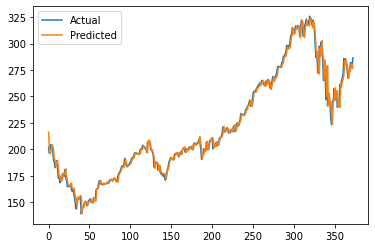

In [26]:
df_pred[['Actual', 'Predicted']].plot()

In this code, the pandas library is used to operate on a DataFrame called "df_pred". 
Using the 'Actual' and 'Predicted' columns of the "df_pred" DataFrame, "df_pred[['Actual', 'Predicted']].plot()" creates a plot or graph. 
It selects the columns 'Actual' and 'Predicted' from the DataFrame using double square brackets '[['Actual', 'Predicted']]' and then calls the "plot()" function. 
The "plot()" function generates a line plot that plots the values from the 'Actual' column against the corresponding values from the 'Predicted' column by default. 
With this line of code, you can visually compare and assess the model's performance by comparing actual and predicted values. This helps identify any deviations or trends between the predictions and the actual values.

For the test data, the Predictions look good! 